In [1]:
#Dataset/Dataloader 실습

In [2]:
#Dataset=data와 label저장
#Dataloader=iterable한 객체로 감싸줘서 모델에 공급될 수 있도록 데이터 불러옴

In [3]:
#library import
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [4]:
# 고정
torch.manual_seed(42)

In [4]:
###########data Transform

transform = transforms.Compose( 
    [transforms.ToTensor(), #이미지가 0~1사이 값으로 변경->파이토치를 사용해서 분석을 진행하기 위해서는 이미지를 텐서로 변환하여 모델에 적용
     transforms.Normalize((0.5), (0.5))] #-1~1사이의 값으로 정규화 시킴 이미지마다 명도,채도등 다르기때문에 이미지를 동일한 환경에 맞춰줌 #channel이 한개이기 때문에 한개의 채널에만 적용
)

In [5]:
##Dataset 저장

train_data=torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform #tensor로 변환
)

test_data=torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform #tensor로 변환
)

In [6]:
##EDA
import matplotlib.pyplot as plt

In [7]:
dir(train_data) #변수확인&매소드확인

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [9]:
train_data[1] #data tensor값, 라벨값 추출

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9922, -1.0000,
           -1.0000, -1.0000, -1.0000, -0.6784,  0.4745, -0.1922, -0.5765,
           -0.6235, -0.6627, -0.3176,  0.3176,  0.0431, -0.8745, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -0.9922, -1.0000, -1.0000, -1.0000,
           -0.6157,  0.0667,  0.7176,  0.6941,  0.7882,  0.8510,  1.0000,
            1.0000,  1.0000,  1.0000,  0.7020,  0.6863,  0.9922,  0.8118,
            0.2549, -0.6471, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.8902,  0.3804,
            0.7412,  0.7569,  0.6627,  0.5922,  0.5529,  0.5373,  0.5686,
            0.6863,  0.6000,  0.5843,  0.5765,  0.5765,  0.5765,  0.6392,
            0.7098,  0.7569,  0.2863, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.4745,  0.7176,
            0.5686,  0.5529,  0.584

In [10]:
#train data
print(train_data.classes) #클래스확인
print(type(train_data))
print(train_data.data[1,1])
print(train_data.data.size()) #train set은 6만개의 28x28사이즈 이미지로 구성됨

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
<class 'torchvision.datasets.mnist.FashionMNIST'>
tensor([  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236, 255,
        255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,   0,   0],
       dtype=torch.uint8)
torch.Size([60000, 28, 28])


In [11]:
trainclass=train_data.classes
trainclass[0] #라벨값으로 class명 추출

'T-shirt/top'

In [12]:
#Data EDA
#class dictionary
labels_map={
    0: trainclass[0],
    1: trainclass[1],
    2: trainclass[2],
    3: trainclass[3],
    4: trainclass[4],
    5: trainclass[5],
    6: trainclass[6],
    7: trainclass[7],
    8: trainclass[8],
    9: trainclass[9],
}

print(labels_map)
print(labels_map[0]) #라벨값과 실제 클래스 이름 맵핑

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
T-shirt/top


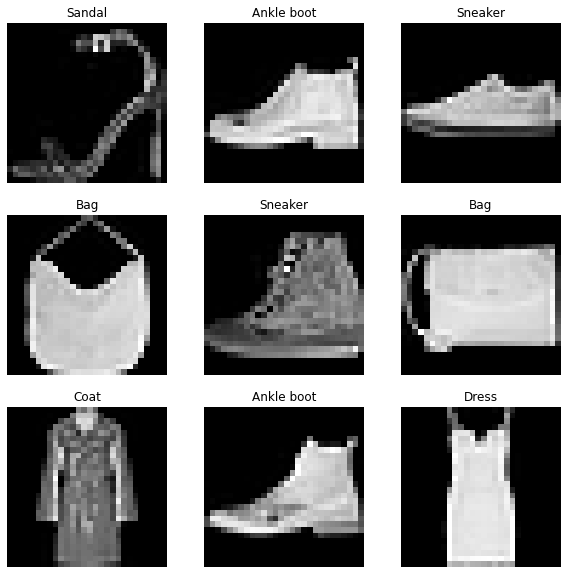

In [14]:
figure=plt.figure(figsize=(10,10)) #plt.figure()는 새로운 figure를 생성해준다

cols, rows= 3,3

for i in range(1,cols*rows+1): #for문을 통해 랜덤으로 0개의 데이터 뽑고 시각화 해주는 part
    sample_idx=torch.randint(len(train_data),size=(1,)).item() #1~60000중 랜덤숫자 추출
    img, label= train_data[sample_idx] #첫번째 텐서값을 이미지, 두번째 정수값을->라벨값으로
    figure.add_subplot(rows,cols,i) #figure.add_subplot(3,3,1),,,figure.add_subplot(3,3,9) 순서대로 이미지 나타내줌 key, value값
    plt.title(labels_map[label]) #해당라벨에대해서 label_map dic에서 텍스트값 추출 
    plt.axis('off') #axis제거
    plt.imshow(img.squeeze(),cmap='gray') #squeeze->차원이 1인 차원을 제거해줌, cmap='이미지컬러' ex) x=torch.ones(10,5,1,3,1)->x.squeeze()->torch.ones(10,5,3)으로 바꿔줌 바꿔주는 이유는? 차원을 축소하여 그래프를 알맞게 그리기 위함.
plt.show()

In [15]:
##test data
print(test_data.classes) #클래스확인
print(type(test_data))
print(test_data.data.size()) #train set은 6만개의 28x28사이즈 이미지로 구성됨

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
<class 'torchvision.datasets.mnist.FashionMNIST'>
torch.Size([10000, 28, 28])


In [17]:
##################train test class별 개수 구하기

train_class_count=dict()


for train_item in train_data: #이미지 텐서값 라벨값 반환
    label=train_data.classes[train_item[1]] #차례대로 첫번째부터 라벨값 추출
    if label not in train_class_count: 
        train_class_count[label] =1 #첫번쨰로 라벨이 나오면 1로 주고 그다음부터 +1씩
    else:
        train_class_count[label] +=1
        
train_class_count

{'Ankle boot': 6000,
 'T-shirt/top': 6000,
 'Dress': 6000,
 'Pullover': 6000,
 'Sneaker': 6000,
 'Sandal': 6000,
 'Trouser': 6000,
 'Shirt': 6000,
 'Coat': 6000,
 'Bag': 6000}

In [18]:
##################train test class별 개수 구하기

test_class_count=dict()


for test_item in test_data:
    label=test_data.classes[test_item[1]] #차례대로 첫번째부터 라벨값 추출
    if label not in test_class_count: #
        test_class_count[label]=1
    else:
        test_class_count[label] +=1
        
test_class_count

{'Ankle boot': 1000,
 'Pullover': 1000,
 'Trouser': 1000,
 'Shirt': 1000,
 'Coat': 1000,
 'Sandal': 1000,
 'Sneaker': 1000,
 'Dress': 1000,
 'Bag': 1000,
 'T-shirt/top': 1000}

In [19]:
'''
train data-> class별로 6000개
test data-> class별로 1000개
'''

'\ntrain data-> class별로 6000개\ntest data-> class별로 1000개\n'

In [20]:
#DATA LOADER

In [21]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2) 
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False, num_workers=2) 

In [22]:
#trainloader.dataset

In [23]:
#testloader.dataset

In [25]:
#Dataloader EDA
#DataLoader를 통해 반복하기->이미지, 라벨 뽑아내기 EDA
#이미지와 라벨값을 표시

train_images, train_labels = next(iter(trainloader))
print(train_images) #이미지 텐서값 추출
print(train_labels) #라벨값 추출
###batch size-> 64개에 대한 텐서값, 라벨값 추출

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.000

In [26]:
print(f"Feature batch shape: {train_images.size()}") #f'문자열 {변수} 문자열' f-string 64x1x28x28->(batch_size,channel,image height,image weight
print(f"Labels batch shape: {train_labels.size()}")
img=train_images[0].squeeze() #channel=1 이기때문에 1인차원을 scalar로 변환 채널을 없애야함. 채널을 없애줘야 화면에 그릴수 있음, 1인차원을 없애주어야함(Invalid dimensions for image data)
label=train_labels[0]
print(train_labels[0])
print(img.size())
#이미지별 라벨별 사이즈. 이미지는 64x1x28x28 label=64개
#matplotlib에서 흑백 두톤만 가지는 그래프는 채널 즉 1인차원을 없애줘야함

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
tensor(0)
torch.Size([28, 28])


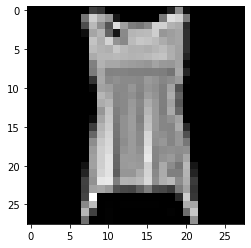

Label:0
Class name:T-shirt/top


In [27]:
plt.imshow(img,cmap='gray')
plt.show()
print(f'Label:{label}')
labeling=int(label)
print(f'Class name:{labels_map[labeling]}')

In [28]:
############내가 이미지를 가지고있는경우
###########Custom dataset만들기

In [29]:
# Custom dataset, Transform, DataLoader 생성

class Customdataset(Dataset): #Dataset 상속받음->from torch.utils.data import Dataset, DataLoader여기서 Dataset클래스 상속받음(데이터를 활용하고 모델에 입력하기위해)
    def __init__(self,np_data,transform=None): #모델에 사용할 데이터를 담아둠, 모델에 사용할 데이터 저장
        self.data=np_data #데이터 저장
        self.transform=transform #데이터 전처리
        self.len=np_data.shape[0] #torch.Size([60000, 28, 28]) 첫번째가 전체 데이터 개수이기 때문에 0으로
    def __len__(self): #데이터 개수 리턴, 학습에 사용할 데이터의 총개수 얼마만큼의 인덱스를 사용할지 반환해줌
        return self.len
    def __getitem__(self,idx): #index에 해당하는 데이터를 리턴해줌, numpy나 tensor형식으로 반환함
        sample=self.data[idx]
        if self.transform: #데이터 변환까지 하고 가져오기
            sample = self.transform(sample)
        return sample

In [30]:
#transform 생성

def square(sample):
    return sample**2

In [31]:
transform1=transforms.Compose([square])

In [32]:
np_data = np.arange(12)
np_data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [33]:
custom_dataset=Customdataset(np_data,transform=transform1)

In [34]:
print(type(custom_dataset))
print(custom_dataset[3])
print(len(custom_dataset))

<class '__main__.Customdataset'>
9
12


In [35]:
custom_dataloader=DataLoader(custom_dataset,batch_size=2,shuffle=True) #데이터로더 생성

In [36]:
print(type(custom_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [37]:
for epoch in range(3): #epoch
    for data in custom_dataloader:
        print(data)
    print("=="*20)

tensor([ 25, 100], dtype=torch.int32)
tensor([64,  4], dtype=torch.int32)
tensor([121,   9], dtype=torch.int32)
tensor([ 1, 49], dtype=torch.int32)
tensor([36, 81], dtype=torch.int32)
tensor([ 0, 16], dtype=torch.int32)
tensor([36, 64], dtype=torch.int32)
tensor([16, 25], dtype=torch.int32)
tensor([49,  0], dtype=torch.int32)
tensor([  1, 121], dtype=torch.int32)
tensor([81,  9], dtype=torch.int32)
tensor([  4, 100], dtype=torch.int32)
tensor([ 1, 64], dtype=torch.int32)
tensor([36, 81], dtype=torch.int32)
tensor([49, 25], dtype=torch.int32)
tensor([121, 100], dtype=torch.int32)
tensor([16,  0], dtype=torch.int32)
tensor([9, 4], dtype=torch.int32)


In [38]:
#Model 생성

In [41]:
'''
device= 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
#GPU사용
'''

"\ndevice= 'cuda' if torch.cuda.is_available() else 'cpu'\nprint('Using {} device'.format(device))\n#GPU사용\n"

In [42]:
import torch.nn as nn #deep learning model에 필요한 모듈이 모아져있는 패키지, 신경망을 구축하기 위한 데이터 구조나 레이어 정의

In [47]:
#Model Class만들기

class NeuralNetwork(nn.Module): #nn.Module 상속
    def __init__(self):
        super(NeuralNetwork,self).__init__() #상위클래스상속
        self.flatten=nn.Flatten() #28x28->flatten vector
        self.linear_relu_stack=nn.Sequential( #한번에 묶어서
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Dropout(0.2), #주로 activation function 뒤에 적용해줌, 신경망에서 노드를 제거하여 학습하는것, 과적합될 가능성을 줄여줌 p=probability of an element to be zeroed. Default: 0.5, 20%의 노드를 사용하지 않음.
            nn.Linear(128,10)
        )
        
    def forward(self,x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x) #layer 2개
        return logits
        
model=NeuralNetwork()     
#Convolution->batch normalization->activation->dropout->pooling 참조:Stackoverflow

In [48]:
'''
#model instance 생성, device생성

model=NeuralNetwork().to(device) #gpu로 모델 보내줌->이유:
print(model)
'''

'\n#model instance 생성, device생성\n\nmodel=NeuralNetwork().to(device) #gpu로 모델 보내줌->이유:\nprint(model)\n'

In [51]:
#random data만들어 예측

X=torch.rand(1,28,28)
print(X)
logits=model(X) #10개의 텐서값으로 반환
pred_probab=nn.Softmax(dim=1)(logits) #softmax->적용 전체합이 1이되도록 반환 loss.function
y_pred=pred_probab.argmax(1) #텐서에 있는 가장 큰값 인덱스 추출, 행기준이기 때문에 1을넣어줌 열기준이면 0
print(f'predicted class:{y_pred}')

tensor([[[2.6401e-02, 3.2101e-01, 2.2064e-01, 6.3331e-02, 3.4476e-01,
          8.8958e-02, 8.5669e-01, 6.8498e-01, 5.4480e-01, 8.6854e-02,
          7.5178e-01, 4.9991e-01, 7.3163e-01, 2.6919e-01, 1.8189e-01,
          3.4447e-01, 5.1891e-01, 3.4605e-01, 4.5626e-01, 1.7675e-01,
          3.1271e-01, 2.9783e-01, 3.5606e-01, 5.3357e-01, 5.0089e-01,
          6.2711e-01, 1.3469e-01, 3.4988e-01],
         [4.5517e-01, 6.1199e-01, 5.4813e-01, 7.4112e-01, 8.9315e-01,
          9.2759e-01, 7.7536e-01, 4.8713e-01, 1.0704e-01, 2.5221e-02,
          5.6369e-01, 2.4057e-01, 6.2040e-01, 3.0202e-01, 8.5381e-01,
          1.4882e-01, 2.0220e-02, 8.0991e-01, 8.2042e-01, 3.4333e-01,
          9.7369e-01, 6.6996e-01, 3.8722e-01, 9.7454e-01, 5.5271e-02,
          7.3405e-01, 4.3702e-01, 9.0499e-01],
         [4.0425e-01, 2.7907e-01, 7.3207e-01, 6.6640e-01, 3.7923e-01,
          4.7999e-01, 1.4658e-01, 4.0645e-01, 8.6010e-01, 1.9437e-01,
          9.8214e-01, 8.1734e-01, 7.2229e-01, 2.7956e-01, 7.2362e-

In [52]:
print(logits) #10개의 출력값 반환
print(pred_probab) #0~1사이 확률값, softmax함수를 거쳐서
print(torch.sum(pred_probab)) #10개의 확률을 더하면 1
y_pred=torch.argmax(pred_probab) #가장 큰 확률을 가진 인덱스 값
print(y_pred) #가장큰값 인덱스 반환

tensor([[-0.2773,  0.0631,  0.0208,  0.1170,  0.1402, -0.1274, -0.1204, -0.1503,
         -0.0758,  0.0934]], grad_fn=<AddmmBackward0>)
tensor([[0.0776, 0.1090, 0.1045, 0.1150, 0.1177, 0.0901, 0.0907, 0.0881, 0.0949,
         0.1124]], grad_fn=<SoftmaxBackward0>)
tensor(1.0000, grad_fn=<SumBackward0>)
tensor(4)


In [54]:
'''
y_pred=pred_probab.argmax(1)
print(y_pred)
'''

'\ny_pred=pred_probab.argmax(1)\nprint(y_pred)\n'

In [55]:
'''
50000/64
'''

'\n50000/64\n'

In [56]:
######실제데이터 Training

In [57]:
loss_fn=nn.CrossEntropyLoss() #다중분류

In [58]:
#optimizer
import torch.optim as optim #학습에 관련된 optimizing method가 있는 패키지

In [59]:
learning_rate=1e-3
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate) #weight update

In [122]:
#load the Tensorboard
%load_ext tensorboard

In [123]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./logs/Tensorboard')

In [128]:
# 새모델 instance 생성

model1=NeuralNetwork()
print(model1)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [131]:
model1.eval()
test_loop(testloader,model1,loss_fn) #학습안된 상태로 나옴

데이터 전체 사이즈:10000, 총 배치수:157
Test Error :
 Accuracy:  10.4%, AVG loss: 2.294030 



2.2940297855693066

In [134]:
#모델 학습 Part


def train_loop(dataloader,model,loss_fn,optimizer):
    size=len(dataloader.dataset) #데이터의 전체개수
    num_batches_train=len(dataloader)
    total_loss=0.0
    print(f'데이터 전체 사이즈:{size}, 총 배치수:{num_batches_train}') #1
    for batch, data in enumerate(dataloader): #이미지와 라벨값 추출 배치단위로, batch 써준이유는 밑에 200번의 배치마다 Loss값을 출력하기위함,0부터 시작
        inputs,labels=data
        pred=model(inputs) #dataloader에서 이미지 데이터 부분을 학습
        loss=loss_fn(pred,labels) #model을통해 나온 최종 예측값, 실제 라벨값과의 차이를 계산해주는 부분.
        
        #backpropagation
        optimizer.zero_grad() #이전 데이터의 미분값이 다음 데이터 역전파의 미분값에 누적되는 것을 방지하기 위해 사용
        loss.backward() #backpropagation
        optimizer.step() #weight bias step마다 업데이트
        
        if batch % 200 == 0: #200번 배치마다 loss값 출력, 현재까지 몇개했는지 출력
            loss,current = loss.item(), batch * len(X) # 64개의 로스 평균값임-> loss=0,200,,400번째 loss 0.17171473801136017이런식으로 나옴 current= [0:937]*64
            print(f'current: {current}') #0
            print(f'loss: {loss:>7f} [{current:5d}/{num_batches_train:>5d}]') #0.163
        total_loss += loss/ len(dataloader) # sum(loss[batch[index]])/987,987개 배치에대한 loss값 다 더해준후 batch 개수로 나눠줌
    return total_loss

            
# For Test
def test_loop(dataloader,model,loss_fn):
    size=len(dataloader.dataset) #10000
    num_batches=len(dataloader) #전체데이터를 배치로 나눈 길이 10000/64=157
    print(f'데이터 전체 사이즈:{size}, 총 배치수:{num_batches}')
    test_loss, correct= 0,0 #0으로만들어주고 시작
    
    with torch.no_grad(): #gradient 계산 X
        for data in dataloader:
            images, labels= data
            pred=model(images)
            test_loss += loss_fn(pred,labels).item() #torch tensor중 scalar값을 뽑아줌, batch당 loss값 더해줌 총 157번 더해줌 ex) 0.5587,,,,,157개
            correct += (pred.argmax(1) ==labels).type(torch.float).sum().item() #각 배치 64개마다 맞춘 개수 더해줌 총 8735개 correctn ex)[54.0, 112.0]
            
            
    test_loss/=num_batches #전체loss sum/157->
    correct /= size #배치당 correct개수/10000->
    print(f'Test Error :\n Accuracy: {(100*correct): 0.1f}%, AVG loss: {test_loss: >7f} \n')
    return test_loss

In [135]:
#학습 진행
parameters=['weight1','bias1', 'weight2', 'bias']

epochs = 5
for t in range(epochs):
    print(f'Epoch {t+1}\n-----------')
    train_loss=train_loop(trainloader,model,loss_fn,optimizer)
    writer.add_scalar('train_loss',train_loss,t) #writer.add_scalar(제목,표현할 값,epoch값), 한그래프에 여러 변수를 그릴경우에 dict형태로 넘겨준다,
    for param, name in zip(model.parameters(),parameters):
        writer.add_histogram(name,param,t) #EPOCH마다 저장
    test_loss=test_loop(testloader,model,loss_fn)
    writer.add_scalar('test_loss', test_loss,t)
print('학습 완료')

Epoch 1
-----------
데이터 전체 사이즈:60000, 총 배치수:938
current: 0
loss: 0.309102 [    0/60000]
current: 200
loss: 0.361382 [  200/60000]
current: 400
loss: 0.098633 [  400/60000]
current: 600
loss: 0.156452 [  600/60000]
current: 800
loss: 0.141860 [  800/60000]
데이터 전체 사이즈:10000, 총 배치수:157
Test Error :
 Accuracy:  87.4%, AVG loss: 0.429018 

Epoch 2
-----------
데이터 전체 사이즈:60000, 총 배치수:938
current: 0
loss: 0.320395 [    0/60000]
current: 200
loss: 0.107814 [  200/60000]
current: 400
loss: 0.234240 [  400/60000]
current: 600
loss: 0.204959 [  600/60000]
current: 800
loss: 0.084890 [  800/60000]
데이터 전체 사이즈:10000, 총 배치수:157
Test Error :
 Accuracy:  87.7%, AVG loss: 0.437787 

Epoch 3
-----------
데이터 전체 사이즈:60000, 총 배치수:938
current: 0
loss: 0.079340 [    0/60000]
current: 200
loss: 0.192354 [  200/60000]
current: 400
loss: 0.214144 [  400/60000]
current: 600
loss: 0.181047 [  600/60000]
current: 800
loss: 0.123154 [  800/60000]
데이터 전체 사이즈:10000, 총 배치수:157
Test Error :
 Accuracy:  87.5%, AVG loss: 

In [136]:
writer.close()

In [137]:
%tensorboard --logdir './logs/Tensorboard'